# A simple Diffusion Model From Scratch in Pytorch

* Sources:
    * https://www.youtube.com/watch?v=a4Yfz2FxXiY
    * https://colab.research.google.com/drive/1sjy9odlSSy0RBVgMTgP7s99NXsqglsUL?usp=sharing#scrollTo=HhIgGq3za0yh

# Utils

In [2]:
# Function to plot a set of images
def print_images(images, labels):
    fig, axes = plt.subplots(4, 5, figsize=(12, 10))
    for idx, ax in enumerate(axes.flatten()):
        image = images[idx].permute(1, 2, 0)  # Reorder the dimensions
        ax.imshow(image, interpolation='nearest')
        ax.set_title(f"{class_names[labels[idx]]}-{labels[idx]}")
        ax.axis('off')
    plt.show()

# Imports

## Libraries

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## Dataset

The Dataset is called StanfordCars Dataset,

In [4]:
# Import the dataset
dataset_full = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transforms.ToTensor())
# Create a data loader to shuffle the data
dataloader = torch.utils.data.DataLoader(dataset_full, batch_size=20, shuffle=True, num_workers=2)
# Get the classes index
class_names = dataset_full.classes

Files already downloaded and verified


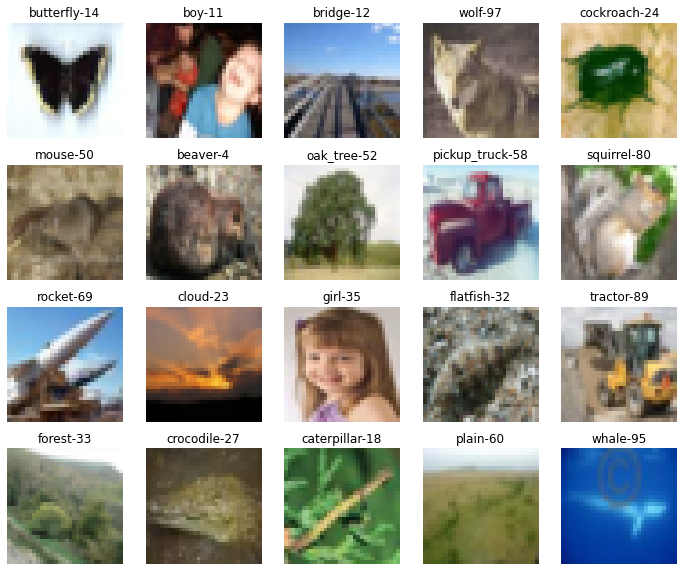

In [5]:
# Load random images
data_iter = iter(dataloader)
images, labels = next(data_iter)
print_images(images, labels)

# Diffusion Model

# Step 1: Forward process : Noise scheduler

This step is the foward process of the diffusion model. It adds noise to the image iteratively.